In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(color_codes=True) #overide maplot libs ugly colours.
mpl.rcParams['figure.figsize'] = [8, 4] #default figure size

In [3]:
def usagerange(x):
    i = 40
    while i <= 200:
        if i+20 >= x >= i:
            break
        i += 20
    return str(i) + '-' + str(i+20) + 'minutes'

In [25]:
def positivity(x):
    if x == 'Happiness':
        return 1
    elif x == 'Neutral':
        return 0
    elif x == 'Boredom':
        return -0.5
    else: 
        return -1

In [26]:
df = pd.read_csv('./test.csv')
df = df.drop('User_ID', axis=1) #user id is not required
df.iloc[46,0], df.iloc[46,1] = df.iloc[46,1],df.iloc[46,0] #swap the mistaken data
df.Age = df.Age.astype(int) #converting str to int
df.rename({'Daily_Usage_Time (minutes)': 'Daily_Usage'}, axis=1, inplace=True)
df = df[df["Gender"].str.contains("Marie") == False] #delete a confusing row
df['Daily_Usage_Range'] = df.Daily_Usage.apply(usagerange) #add a column referring to usage time by 20minute range
df['Emotion_Positivity'] = df.Dominant_Emotion.apply(positivity) #add a column referring to how positive an emotion is by numbers
df.head()

,Age,Gender,Platform,Daily_Usage,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Daily_Usage_Range,Emotion_Positivity
0,27,Female,Snapchat,120,4,40,18,22,Neutral,100-120minutes,0.0
1,21,Non-binary,Snapchat,60,1,18,7,12,Neutral,40-60minutes,0.0
2,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety,100-120minutes,-1.0
3,27,Male,Telegram,105,3,48,20,28,Anxiety,100-120minutes,-1.0
4,21,Non-binary,Facebook,55,3,17,7,12,Neutral,40-60minutes,0.0


In [6]:
df.describe() 

,Age,Daily_Usage,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Emotion_Positivity
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,27.323529,87.598039,2.843137,33.000000,13.627451,20.284314,-0.303922
std,3.612853,33.887776,1.727730,22.672442,8.022149,7.332793,0.700625
min,21.000000,40.000000,1.000000,5.000000,2.000000,10.000000,-1.000000
25%,24.250000,60.000000,1.000000,15.000000,7.000000,15.000000,-1.000000
50%,27.000000,75.000000,2.000000,27.000000,12.000000,20.000000,0.000000
75%,29.750000,105.000000,4.000000,40.000000,18.750000,25.000000,0.000000
max,35.000000,200.000000,8.000000,110.000000,40.000000,45.000000,1.000000


In [7]:
def platformemotion(i):
    hueorder = ['Happiness','Neutral','Boredom','Anxiety','Sadness','Anger']
    sns.countplot(data=i, x = 'Platform', hue="Dominant_Emotion", hue_order=hueorder, palette= "muted")

In [8]:
def usageemotion(i):
    hueorder = ['Happiness','Neutral','Boredom','Anxiety','Sadness','Anger']
    xorder = ['40-60minutes','60-80minutes','80-100minutes','100-120minutes','120-140minutes','140-160minutes','160-180minutes','180-200minutes']
    sns.countplot(data=i, x = 'Daily_Usage_Range', hue="Dominant_Emotion",order=xorder, hue_order=hueorder, palette= "muted")

Text(0.5, 1.0, 'Emotion Count on Different Platforms')

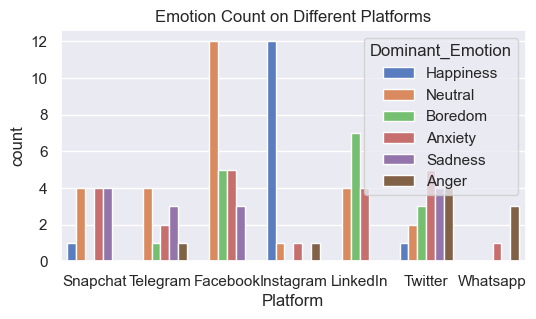

In [14]:
platformemotion(df)
plt.title('Emotion Count on Different Platforms')

Findings:
1. happiest : IG
2. most bored: linkedin
3. most negative (anxiety+sadness+anger): twitter/whatsapp

In [10]:
df.Gender.value_counts() #unused

Gender
Male          47
Non-binary    30
Female        25
Name: count, dtype: int64

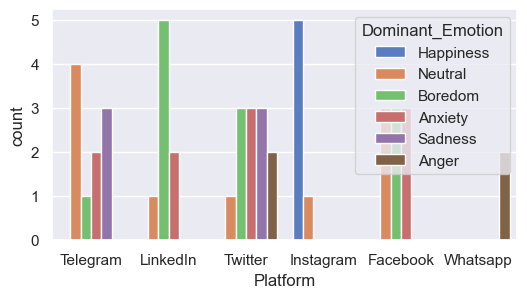

In [11]:
platformemotion(df[df.Gender=='Male']) #unused

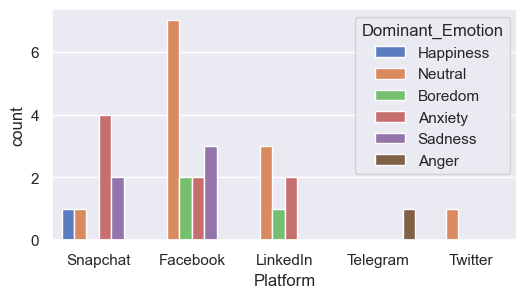

In [12]:
platformemotion(df[df.Gender=='Non-binary']) #unused

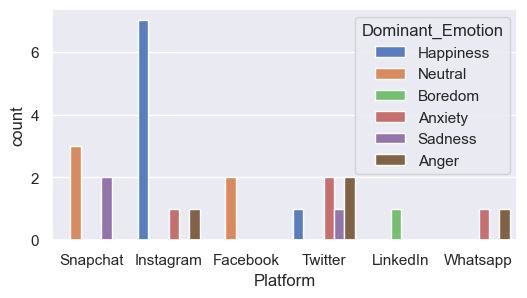

In [13]:
platformemotion(df[df.Gender=='Female']) #unused

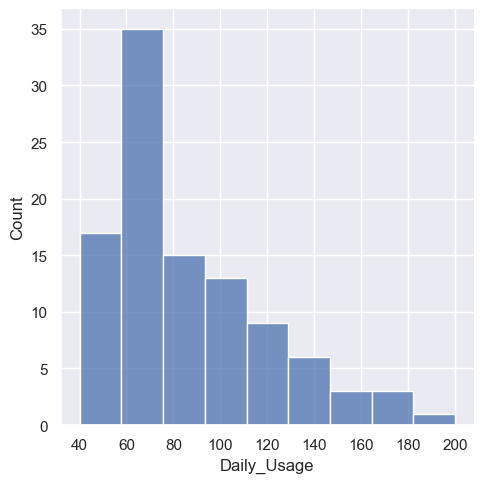

In [16]:
sns.displot(df.Daily_Usage) #unused

Finding: More than 80% people spend at least an hour daily on social media

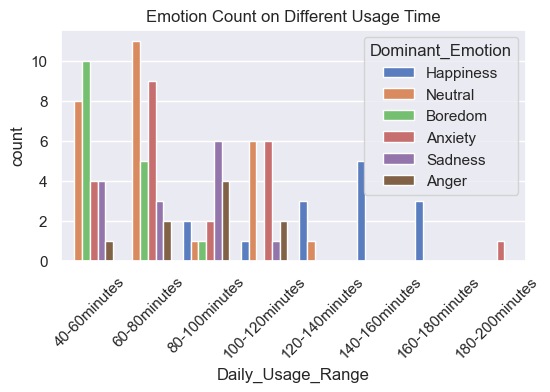

In [24]:
usageemotion(df)
plt.xticks(rotation=45)
plt.title('Emotion Count on Different Usage Time')
mpl.rcParams['figure.figsize'] = [6, 3]

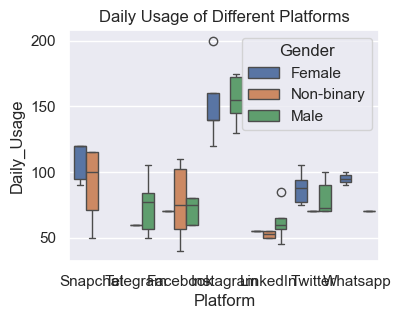

In [65]:
sns.boxplot(data = df,x="Platform",y="Daily_Usage", hue = 'Gender')
plt.title('Daily Usage of Different Platforms')
mpl.rcParams['figure.figsize'] = [4, 3]

Findings:
1. people spend more time on IG
2. people spend less time on linkedin
3. snapchat is not popular among males (0/47)
4. TG is not popular among females (0/25)
5. IG and Whatsapp are not popular among non-binary (0/30)
6. The difference in gender does not say much about how much time one would spend on social media

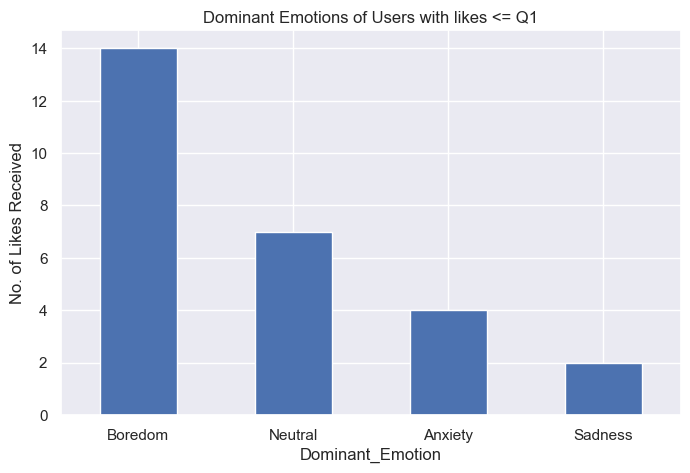

In [53]:
df[df.Likes_Received_Per_Day<=df.Likes_Received_Per_Day.quantile(0.25)].Dominant_Emotion.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.title('Dominant Emotions of Users with likes <= Q1')
plt.ylabel('No. of Likes Received')
mpl.rcParams['figure.figsize'] = [8, 2]

Finding: People with fewer likes received tend to feel less happy and more bored

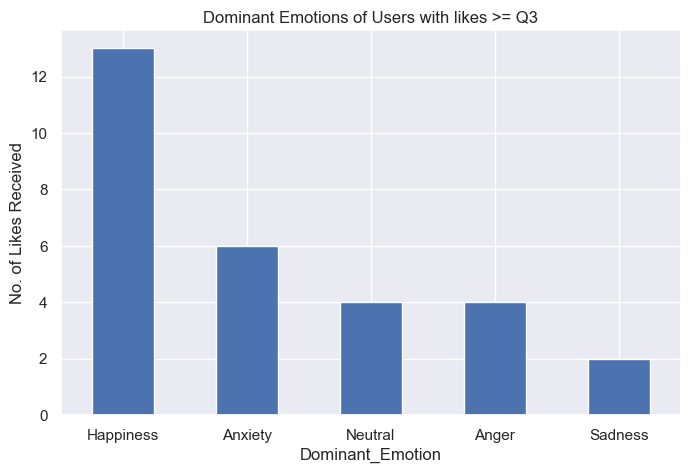

In [55]:
df[df.Likes_Received_Per_Day>=df.Likes_Received_Per_Day.quantile(0.75)].Dominant_Emotion.value_counts().plot.bar()
plt.title('Dominant Emotions of Users with likes >= Q3')
plt.xticks(rotation=0)
plt.ylabel('No. of Likes Received')
mpl.rcParams['figure.figsize'] = [8, 2]

Findings:
1. people with more likes tend to feel happier and less bored
2. but they also tend to feel more negative (anxiety+sadness+anger)

In [27]:
df_quantity = df_quantity = df.iloc[:,[0,3,4,5,6,7,10]] #Retrieving quantitative data only
df_quantity.head()


,Age,Daily_Usage,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Emotion_Positivity
0,27,120,4,40,18,22,0.0
1,21,60,1,18,7,12,0.0
2,28,115,3,38,18,27,-1.0
3,27,105,3,48,20,28,-1.0
4,21,55,3,17,7,12,0.0


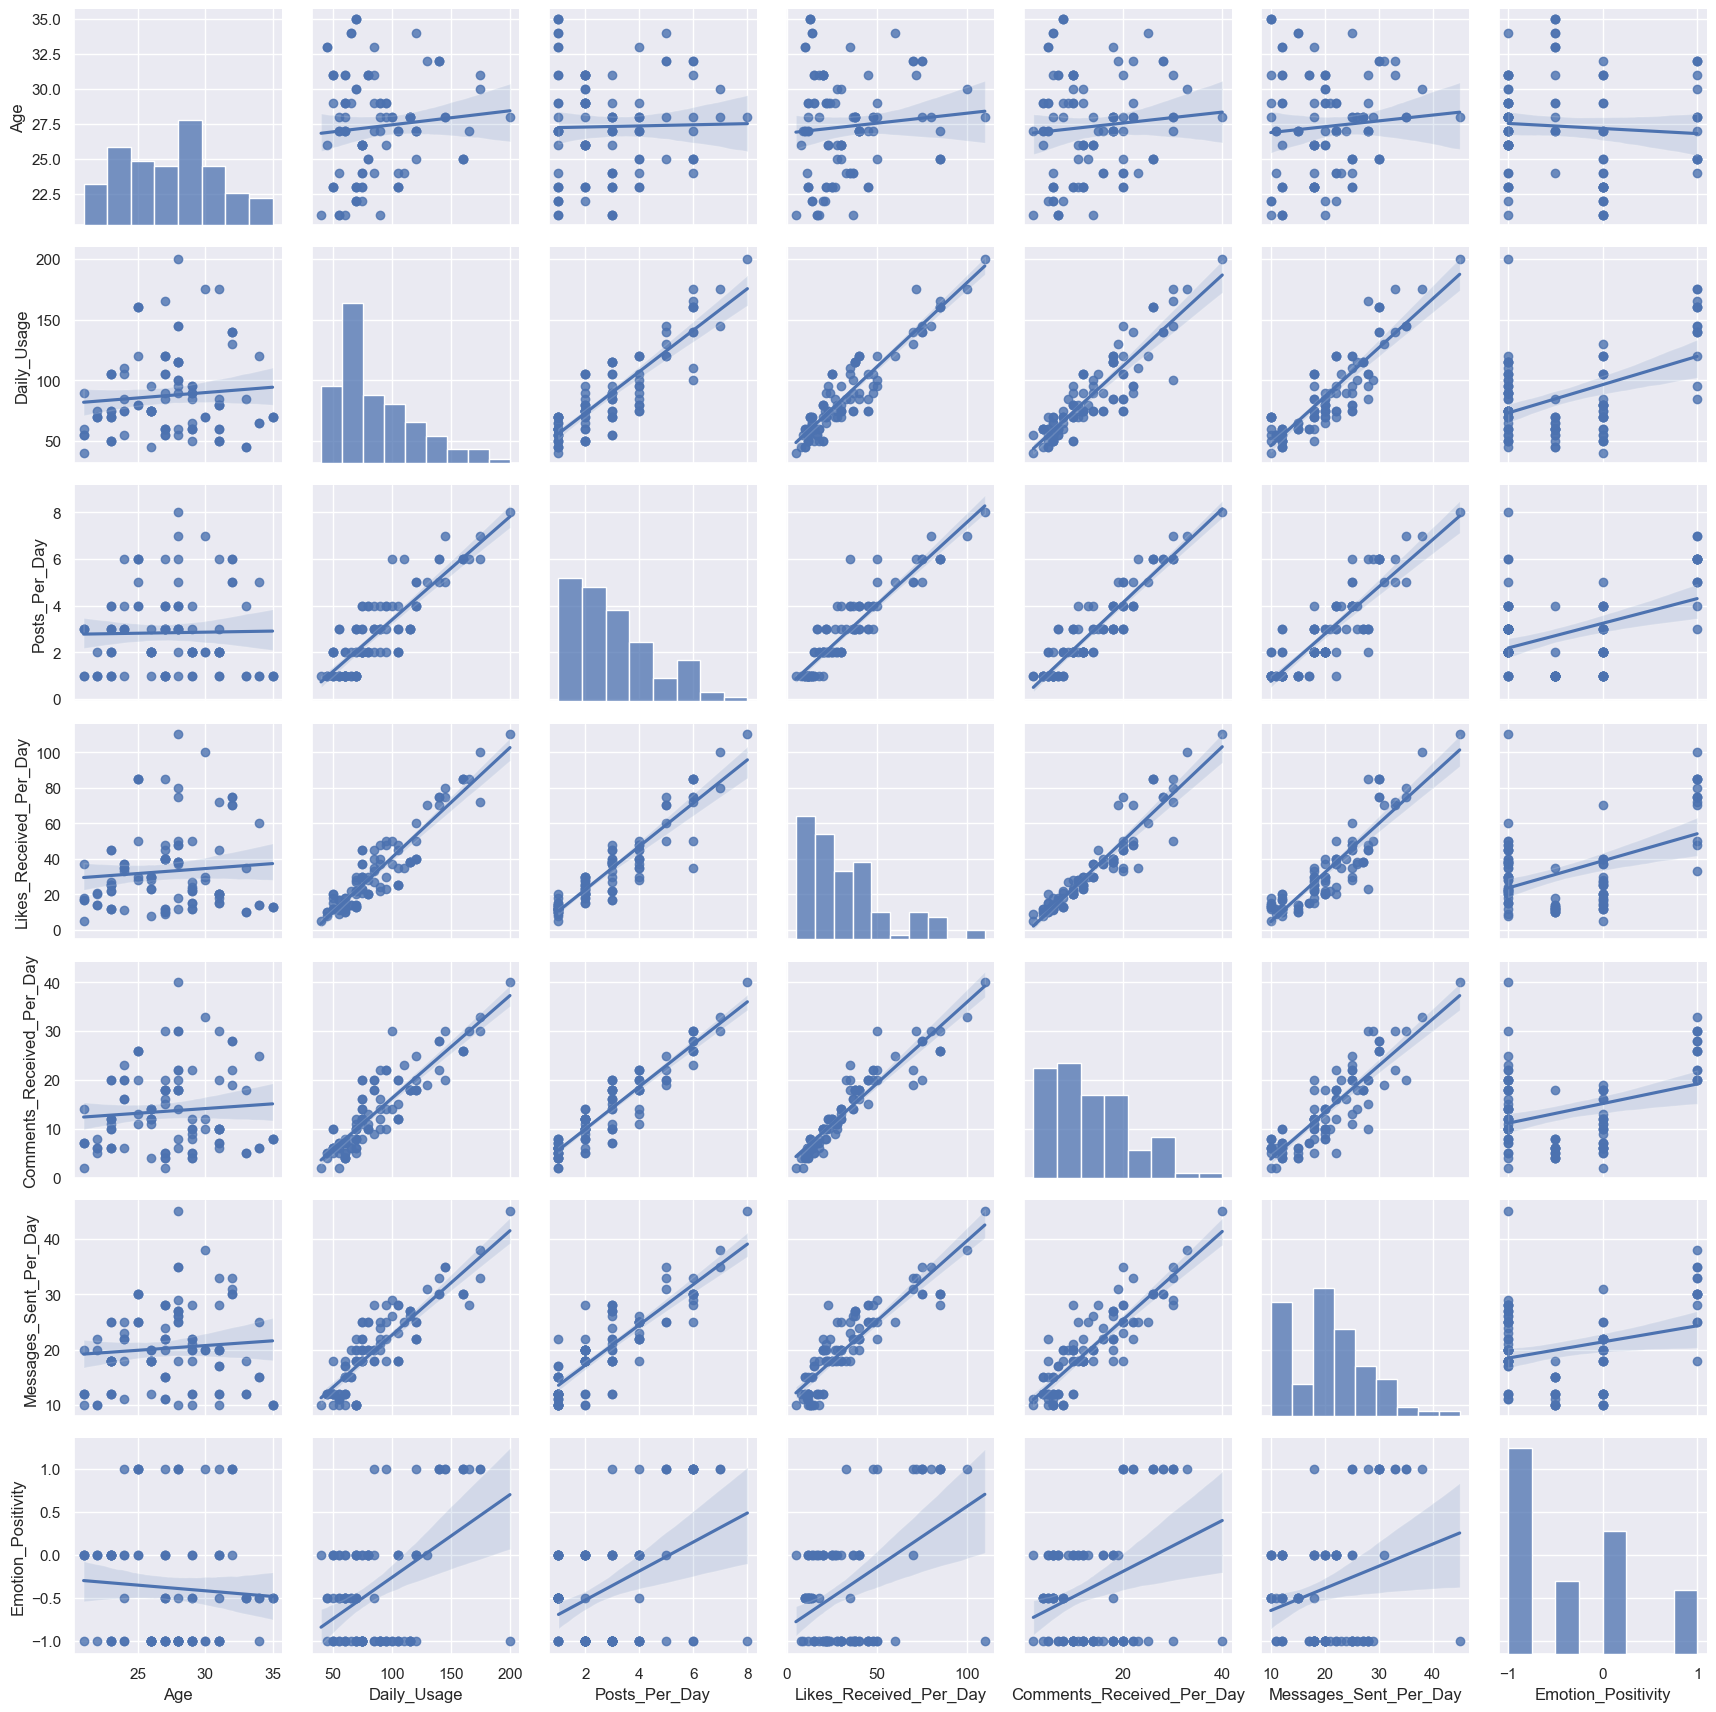

In [28]:
g = sns.PairGrid(df_quantity)
g.map_diag(sns.histplot)#Plotting the distribution
g.map_offdiag(sns.regplot)

Findings: (Unused)
1. daily usage, posts, msgs sent & likes/comments received are right skewed (mean>median)
--> its most likely the case that a few individuals care about social media way more than others

<Axes: >

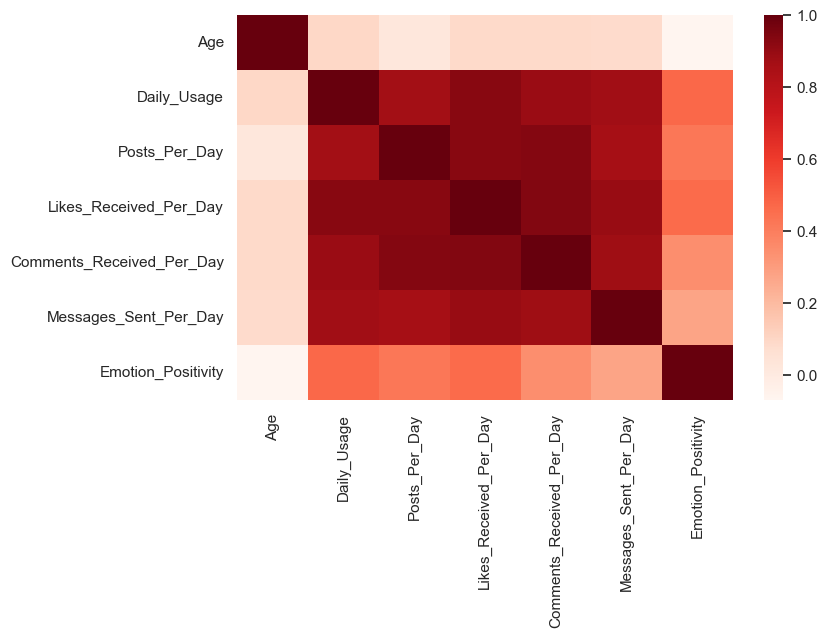

In [66]:
mpl.rcParams['figure.figsize'] = [8, 5]
sns.heatmap(df_quantity.corr(), cmap="Reds")

Findings:
1. Daily usage, posts per day, likes received per day, comment received per day and messages sent per day are highly and positively correlated
2. Age is weakly correlated with other features
3. Emotion Positivity is moderately correlated

<Axes: >

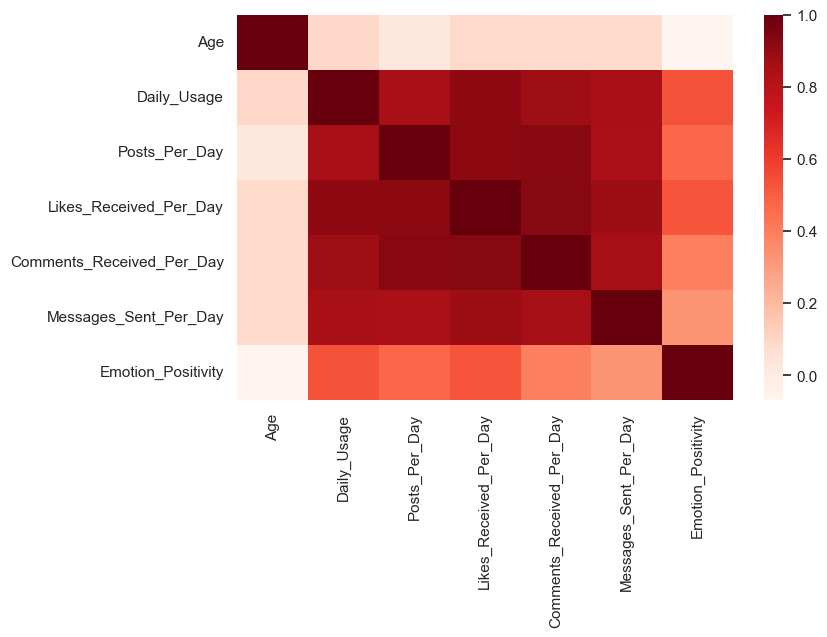

In [68]:
df1 = df_quantity.drop(df.Posts_Per_Day.idxmax()) #dropping an outlier to see the difference
mpl.rcParams['figure.figsize'] = [8, 5]
sns.heatmap(df1.corr(), cmap="Reds")

Finding: the drop of outlier does not make a big difference on the correlation of emotion positivity with other features